In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'January 2019'

<h2>Основная таблица</h2>

In [6]:
rep_2017 = report['2017':]
rep_2018 = report['2018':] # данные за 2018 год
rep_2018

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-01-31     2477   1881         32   5   0     1     74     136      12
2018-02-28     2527   1625         44   7   0     3    121     130      16
2018-03-31     2568   1997         51   6   0    10     79     197      12
2018-04-30     2359   2410         74   5   0     1     56     129       9
2018-05-31     2166   2355         65   4   0     1     42     131      12
2018-06-30     2361   2369         32   3   0     7     64     150      17
2018-07-31     2435   2513         69   1   0     7     51     184       7
2018-08-31     2637   2437         59   1   0     5    115     161       9
2018-09-30     2591   2343         85   4   0     2     84     134       9
2018-10-31     2746   2665         77   2   0     7     86     166      12
2018-11-30     2914   2444         61   3   0     5    162     182      24
2018-12-31     2948   2292         72   4   0     4    116     211      11
2019-01-31     3234   2440        122   4   0     8    113     166       9

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [7]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2019-01-31      286    148         50   0   0     4     -3     -45      -2

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

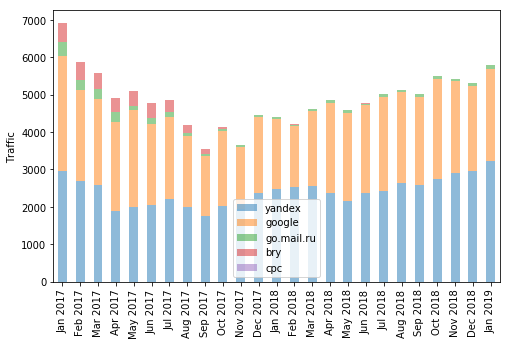

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2017.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
#fig.autofmt_xdate()
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2017.index]);

<h3>Линейная диаграмма изменений трафика</h3>

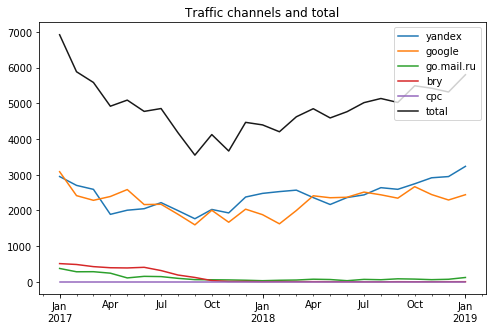

In [9]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2017.channels.plot(ax=ax);
rep_2017.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [10]:
kw = 'keyword visit'.split()

In [11]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing       0      np - /?pid=menu-katalog&yclid=127749052051783368      1
           1                       двери межкомнатные с демонтажом      1
go.mail.ru 0                                             (not set)    122
google     0                                         дешевые двери    336
           1                                          двери дешево    232
           2                                       двери из дерева    189
           3                             np - /?cnt=catalog&r=1428    117
           4                             np - /?cnt=catalog&r=2438     98
           5                                      np - /?pid=pokaz     70
           6                                                np - /     39
           7                                         двери продажа     29
           8                                         полотно двери     22
           9                                       недорогие двери     20
           10                               дверное полотно дешево     18
           11                               дверные полотна купить     18
           12                                       двери в ванную     10
           13                            np - /?cnt=catalog&r=2966      8
           14                                        двери полотно      7
           15                                     двери с коробкой      7
           16                                      двери комнатные      6
           17                             np - /?cnt=catalog&r=999      5
           18                                   np - /?pid=service      5
           19                                      полотна дверные      5
           20                             np - /?cnt=catalog&r=448      4
           21                              np - /?pid=menu-katalog      4
           22                                    полотно для двери      4
           23                                            (not set)      3
           24                             np - /?cnt=catalog&r=379      3
           25                             np - /?cnt=catalog&r=510      3
           26                                   np - /?pid=contact      3
...                                                            ...    ...
yandex     2030                       фрезерованные кухонные двери      1
           2031               фурнитура для дверей гармошка купить      1
           2032                       фурнитура для двери гармошки      1
           2033  фурнитура для складных дверей книжка на два по...      1
           2034        фурнитура стеклянных дверей гармошка купить      1
           2035                             хорошие двери гармошка      1
           2036                              хофф дверцы для кухни      1
           2037                  цвет дверного полотна дуб беленый      1
           2038                   цельностеклянное дверное полотно      1
           2039              цена на двери гармошка в леруа мерлен      1
           2040            цена на направляющие для ездиющей двери      1
           2041            цены на арку дверного проема где купить      1
           2042                 цены на двери гармошка в г коломна      1
           2043   цены на установку стекол в кухонные двери мытищи      1
           2044  черные межкомнатные двери гармошка фото цена л...      1
           2045                             что значит дверь эмаль      1
           2046                     ширина кухонной двери стандарт      1
           2047                             широкие двери гармошка      1
           2048                            шкафные двери гармошкой      1
           2049                        шпон крашенный эмалью дверь      1
           2050   щербинка москва раздвижные двери гармошка купить      1
           2051  электронные дверные замки для квартиры интерне...      1
           2052                             эмалевые двери comp

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [12]:
data.groupby(level=0, axis=0)[kw].apply(lambda x: x.xs(x.visit.idxmax())) #.xs(0, level=1)

,keyword,visit
bing,np - /?pid=menu-katalog&yclid=127749052051783368,1
go.mail.ru,(not set),122
google,дешевые двери,336
rambler,дверное полотно 2050 х 850 купить,1
yandex,дверь гармошка,192


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [13]:
data_grupped = data.sort_values('visit', ascending=False).groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.iloc[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0  np - /?pid=menu-katalog&yclid=127749052051783368      1
           1                   двери межкомнатные с демонтажом      1
go.mail.ru 0                                         (not set)    122
google     0                                     дешевые двери    336
           1                                      двери дешево    232
           2                                   двери из дерева    189
           3                         np - /?cnt=catalog&r=1428    117
           4                         np - /?cnt=catalog&r=2438     98
rambler    0                 дверное полотно 2050 х 850 купить      1
           1      купить дверное полотно с зеркалом пилкингтон      1
yandex     5                                    дверь гармошка    192
           6                                    двери гармошка     87
           0                                         (not set)     53
           7                                    двери на кухню     31
           9                       дверь гармошка леруа мерлен     30